In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import interpolate
from astropy import units as u
from astropy import constants as c
import matplotlib as mpl

mpl.rcParams['font.sans-serif']='Baskerville'
mpl.rcParams['font.size']=16

In [2]:
df = pd.read_csv('final_data')
df['N'] = df.σ*df['T']*1e18
df
grid_l, grid_b = np.mgrid[df.l.min():df.l.max():200j, df.b.min():df.b.max():200j]
grid_x, grid_y = grid_l, grid_b
points = (np.array(df.l), np.array(df.b))
grid_T = interpolate.griddata(points, df['T'], (grid_x, grid_y), method='cubic')
grid_T = np.nan_to_num(grid_T, nan=grid_T[~np.isnan(grid_T)].mean())
grid_v = interpolate.griddata(points, df['v'], (grid_x, grid_y), method='cubic')
grid_v = np.nan_to_num(grid_v, nan=grid_v[~np.isnan(grid_v)].mean())
grid_σ = interpolate.griddata(points, df['σ'], (grid_x, grid_y), method='cubic')
grid_σ = np.nan_to_num(grid_σ, nan=grid_σ[~np.isnan(grid_σ)].mean())
grid_N = grid_σ*grid_T*1e18
grid_N = np.nan_to_num(grid_N, nan=grid_N[~np.isnan(grid_N)].mean())
grid_N = grid_N*u.cm**-2
scaled_T = ((grid_N-grid_N.min())/(grid_N.max()-grid_N.min())+1)/2

grid_T_err = interpolate.griddata(points, df['T_err'], (grid_x, grid_y), method='nearest')
grid_T_err = np.nan_to_num(grid_T_err, nan=grid_T_err[~np.isnan(grid_T_err)].mean())
grid_v_err = interpolate.griddata(points, df['v_err'], (grid_x, grid_y), method='nearest')
grid_v_err = np.nan_to_num(grid_v_err, nan=0)
grid_σ_err = interpolate.griddata(points, df['σ_err'], (grid_x, grid_y), method='nearest')
# grid_σ_err = np.nan_to_num(grid_σ_err, nan=grid_σ_err[~np.isnan(grid_σ)].mean())
grid_N_err = grid_σ_err*grid_T_err*1e18
grid_N_err = grid_N.mean()*np.sqrt((grid_T_err/grid_T)**2+(grid_σ_err/grid_σ)**2)

# grid_N_err = np.nan_to_num(grid_N_err, nan=grid_N_err[~np.isnan(grid_N_err)].mean())
scaled_T_err = ((grid_T_err-grid_T_err.min())/(grid_T_err.max()-grid_T_err.min())+1)/2
scaled_v_err = ((grid_v_err-grid_v_err.min())/(grid_v_err.max()-grid_v_err.min())+1)/2
scaled_N_err = ((grid_N_err-grid_N_err.min())/(grid_N_err.max()-grid_N_err.min())+1)/2


# grid_z01 = interpolate.griddata(points, T, (grid_x, grid_y), method='linear')
# grid_z02 = interpolate.griddata(points, T, (grid_x, grid_y), method='cubic')

Text(0.5, 0, 'l [$^{\\circ}$]')

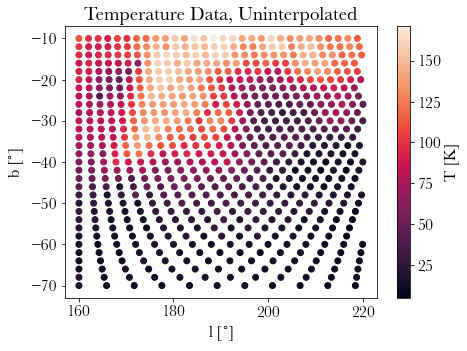

In [3]:
#sample plot:


fig, ax = plt.subplots(figsize=(7, 5))
clrs = ax.scatter(df.l, df.b, c=df['T'], cmap='rocket')
fig.colorbar(clrs, label='T [K]')
ax.set_title('Temperature Data, Uninterpolated')
ax.set_ylabel('b [$^{\circ}$]')
ax.set_xlabel('l [$^{\circ}$]')

Text(0.5, 1.01, 'Maps for Temperature, Velocity, and Column Density')

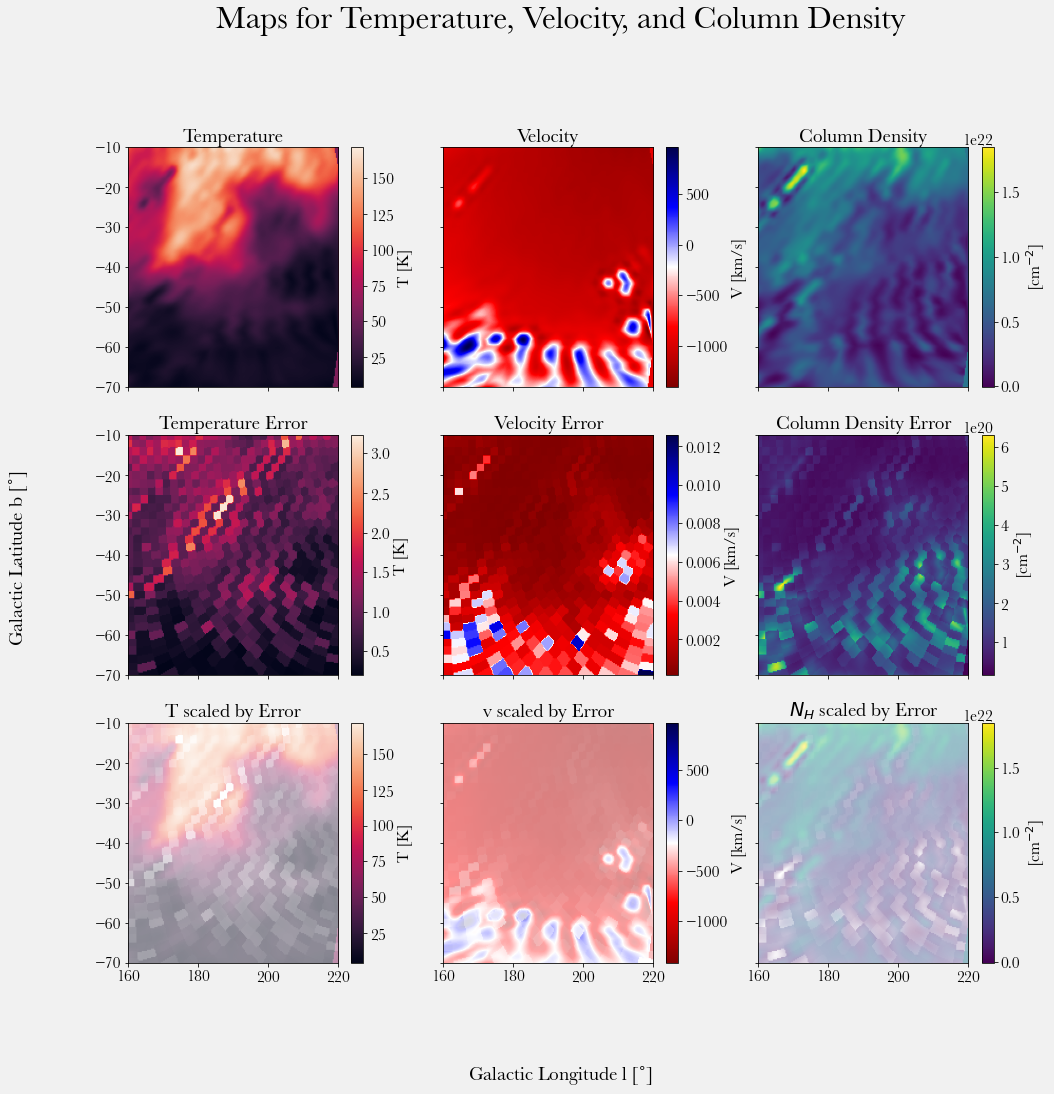

In [20]:
fig, ax = plt.subplots(figsize=[16, 15], facecolor='#f1f1f1', ncols=3, nrows=3, squeeze=True, sharex=True, sharey=True)
# fig.tight_layout()


im1 = ax[0, 0].imshow(grid_T.T, cmap='rocket', origin='lower', aspect='auto', extent=[160, 220, -70, -10])
fig.colorbar(im1, label='T [K]', ax=ax[0, 0])
ax[0, 0].set_title('Temperature')
im2 = ax[0, 1].imshow(grid_v.T, cmap='seismic_r', origin='lower',aspect='auto', extent=[160, 220, -70, -10])
fig.colorbar(im2, label='V [km/s]', ax=ax[0, 1])
ax[0, 1].set_title('Velocity')
im3 = ax[0, 2].imshow(grid_N.T, cmap='viridis', origin='lower',aspect='auto', extent=[160, 220, -70, -10])
fig.colorbar(im3, label=r'[cm$^{-2}$]', ax=ax[0, 2])
ax[0, 2].set_title('Column Density')
im4 = ax[1, 0].imshow(grid_T_err.T, cmap='rocket', origin='lower', aspect='auto', extent=[160, 220, -70, -10])
fig.colorbar(im4, label='T [K]', ax=ax[1, 0])
ax[1, 0].set_title('Temperature Error')
im5 = ax[1, 1].imshow(grid_v_err.T, cmap='seismic_r', origin='lower',aspect='auto', extent=[160, 220, -70, -10])
fig.colorbar(im5, label='V [km/s]', ax=ax[1, 1])
ax[1, 1].set_title('Velocity Error')
im6 = ax[1, 2].imshow(grid_N_err.T, cmap='viridis', origin='lower',aspect='auto', extent=[160, 220, -70, -10])
fig.colorbar(im6, label=r'[cm$^{-2}$]', ax=ax[1, 2])
ax[1, 2].set_title('Column Density Error')
im4 = ax[2, 0].imshow(grid_T.T, cmap='rocket', origin='lower', aspect='auto',extent=[160, 220, -70, -10], alpha=1-scaled_T_err.T)
fig.colorbar(im4, label='T [K]', ax=ax[2, 0])
ax[2, 0].set_title('T scaled by Error')
im5 = ax[2, 1].imshow(grid_v.T, cmap='seismic_r', origin='lower', aspect='auto',extent=[160, 220, -70, -10], alpha=1-scaled_v_err.T)
fig.colorbar(im5, label='V [km/s]', ax=ax[2, 1])
ax[2, 1].set_title('v scaled by Error')
im6 = ax[2, 2].imshow(grid_N.T, cmap='viridis', origin='lower',aspect='auto', extent=[160, 220, -70, -10], alpha=1-scaled_N_err.T)
fig.colorbar(im6, label=r'[cm$^{-2}$]', ax=ax[2, 2])
ax[2, 2].set_title(f'$N_H$ scaled by Error')

fig.supylabel('Galactic Latitude b [$^{\circ}$]')
fig.supxlabel('Galactic Longitude l [$^{\circ}$]')
fig.suptitle('Maps for Temperature, Velocity, and Column Density', fontsize=32, y=1.01, style='italic')


Text(0.5, 1.1, 'Final Parameters of Interest, with Error Bars')

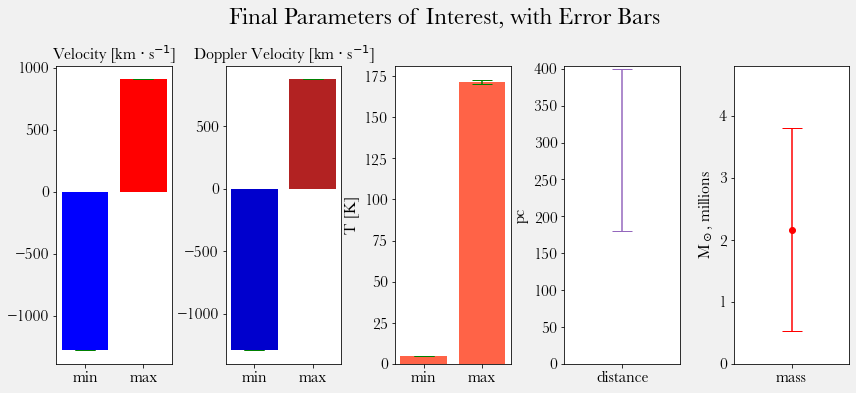

In [5]:
d = 290*u.pc #assuming a constant distance of 400 pc
dlow = 180
dhigh = 400
d_err = (400-180)/2*u.pc
f = ((220-160)/360)*(60/180)
beam_angle = ((4*u.deg)**2).to(u.sr) #assumes a beam angle of 4 degrees by 4 degrees
area_array = np.ones([200, 200])*d**2*beam_angle
# MHI = (1.8e18*(u.K**-1*u.rad**-2)*(grid_σ)*c.u*(grid_T*u.K)*beam_angle).cgs
# MHI.sum()
M = (grid_N.mean()*4*np.pi*d.to(u.cm)**2*c.u*((220-160)/360)*(60/180)).to(u.M_sun)
# (grid_N_err.mean()*4*np.pi*d.to(u.cm)**2*c.u*((220-160)/360)*(60/180)).cgs.to(u.M_sun)
# error propagation
mean_N_err = ((grid_N.max()-grid_N.min())/2)*np.sqrt(len(df.N))
M_err = (f*c.u*4*np.pi*np.sqrt((2*d*grid_N.mean()*d_err)**2+(d**2*mean_N_err).value)).to(u.M_sun)

fig, ax = plt.subplots(figsize=[12, 5], ncols=5, facecolor='#f1f1f1')
fig.tight_layout()
ax[3].errorbar(x='distance',y=d.value, yerr=d_err.value, capsize=10, fmt='tab:purple')
ax[3].set_ylim(0, 404)
ax[3].set_ylabel(r'pc')
ax[4].set_ylabel(r'M$_\odot$, millions')
M, M_err =M/1e6,  M_err/1e6
ax[4].errorbar(x='mass',y=M.value, yerr=M_err.value, capsize=10, fmt='ro')
ax[4].set_ylim(0, (M_err+M).value+1)
T_min_max = df['T'].min(), df['T'].max()
v_min_max = df['v'].min(), df['v'].max()
doppler_v_min_max = df['v_corr'].min(), df['v_corr'].max()
T_min_max_err = float(df.loc[df['T']== df['T'].min()].T_err), float(df.loc[df['T']==df['T'].max()].T_err)
v_min_max_err = float(df.loc[df['v']== df['v'].min()].v_err), float(df.loc[df['v']==df['v'].max()].v_err)
doppler_v_min_max_err = float(df.loc[df['v_corr']== df['v_corr'].min()].v_err), float(df.loc[df['v_corr']==df['v_corr'].max()].v_err)
ax[2].bar(x=['min', 'max'], height=T_min_max, yerr=T_min_max_err, capsize=10, ecolor='g', color='tomato')
ax[2].set_ylabel(r'T [K]')
ax[1].bar(x=['min', 'max'], height=doppler_v_min_max, yerr=doppler_v_min_max_err, capsize=10, ecolor='g', color=['mediumblue', 'firebrick'])
ax[1].set_title(r'Doppler Velocity [km $\cdot$ s$^{-1}$]', fontsize=16)
ax[0].bar(x=['min', 'max'], height=v_min_max, yerr=v_min_max_err, capsize=10, ecolor='g', color=['b', 'r'])
ax[0].set_title(r'Velocity [km $\cdot$ s$^{-1}$]', fontsize=16)
fig.suptitle('Final Parameters of Interest, with Error Bars', y=1.1, fontsize=24)

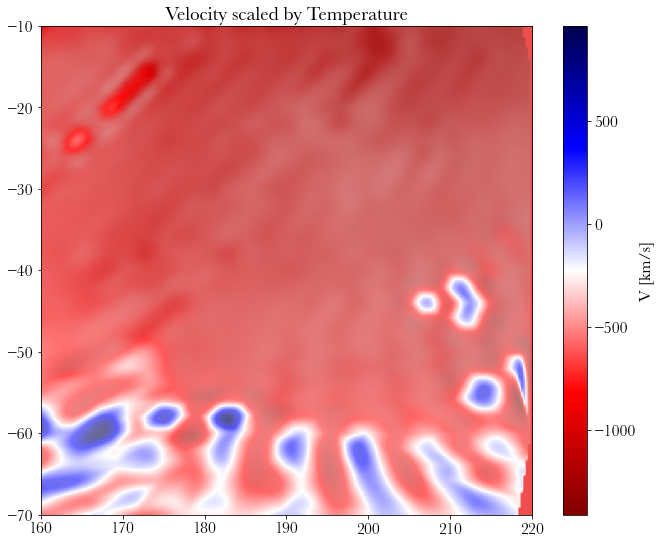

In [6]:
fig, ax = plt.subplots(figsize=[11, 9], squeeze=True, sharex=True, sharey=True)
ax.set_title('Velocity scaled by Temperature')
im2 = ax.imshow(grid_v.T, cmap='seismic_r', origin='lower', aspect='auto', extent=[160, 220, -70, -10], alpha=scaled_T.T)
fig.colorbar(im2, label='V [km/s]')

In [7]:
# print(df['T'].min(), df['T'].max())
# print(df['v'].min(), df['v'].max())
# print(float(df.loc[df['T']== df['T'].min()].T_err), float(df.loc[df['T']==df['T'].max()].T_err))
# print(float(df.loc[df['v']== df['v'].min()].v_err), float(df.loc[df['v']==df['v'].max()].v_err))

In [8]:
# print(f'Mass: {(M-M_err).value} to {(M+M_err).value} solar masses')
# print(f'Velocity: {df['v_corr'].value} to {(M+M_err).value} solar masses')

l goes from 0 to 360
b goes from -90 to 90